In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from plot_keras_history import show_history

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('preprocessed_laptop_data.csv')

# Separate features and target variable
X = data.drop(columns=['Price'])
y = data['Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')
print(y_train.shape, 'train target samples')
print(y_test.shape, 'test target samples')

(3184, 9) train input samples
(796, 9) test input samples
(3184,) train target samples
(796,) test target samples


Best Model:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               2560      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35585 (139.00 KB)
Trainable params: 35585 (139.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
100/100 [==============================] - 1s 4ms/step - loss: 319001.2188 - mse: 319001.2188 - val_loss: 315261.7500 - val_mse: 315261.7500
Epoch 2/1000
100/100 [==============================] - 0s 3ms/step - loss: 310570.0000 - mse: 310570.0000 - val_loss: 307267.

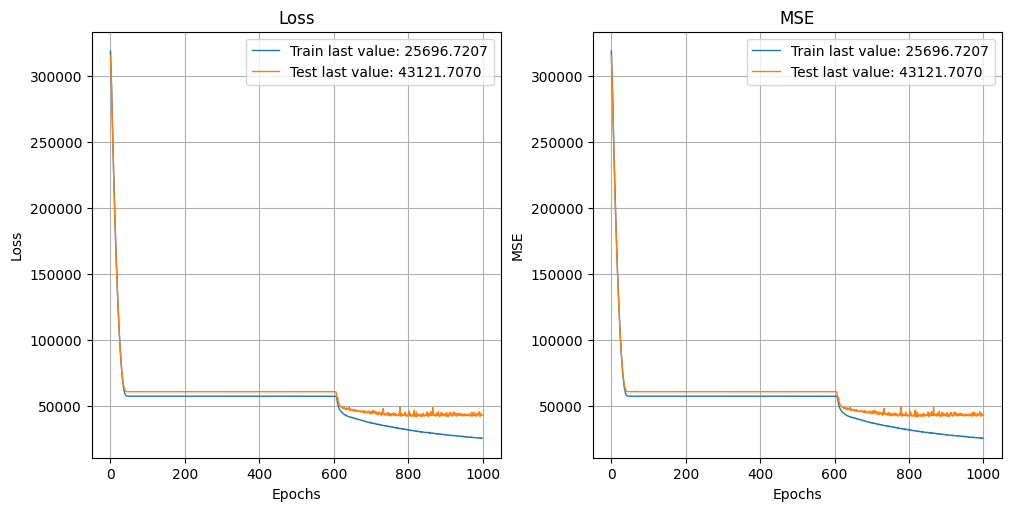

In [5]:
epochs = 1000

model = Sequential()
model.add(layers.Dense(256, activation='sigmoid', input_shape=(9, )))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(1))
model.summary()

model.compile(loss='mse', metrics=['mse'])
history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

model.save('./best_model.h5')

show_history(history)